# Обучение без учителя
# Кластеризация

**Параметры кластеризации:**

n_clusters — количество кластеров. По умолчанию — 8.  

init — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.

n_init — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.  

max_iter — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.  

random_state — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


Визуализация кластеров по двум признакам

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

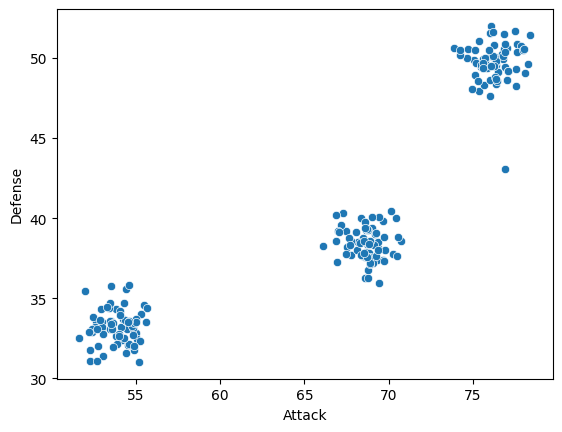

In [3]:
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,1
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,1
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,1
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,1
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,0


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

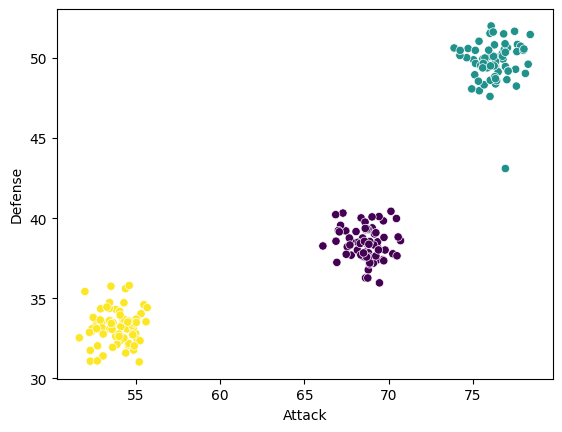

In [4]:
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10, 
                random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)

# если мы хотим получить метки класса для тех же данных, 
# на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions
display(df)
#визуализируем результаты. 
# Параметр c принимает вектор с номерами классов 
# для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Пробуем делить на четыре кластера для выброса

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

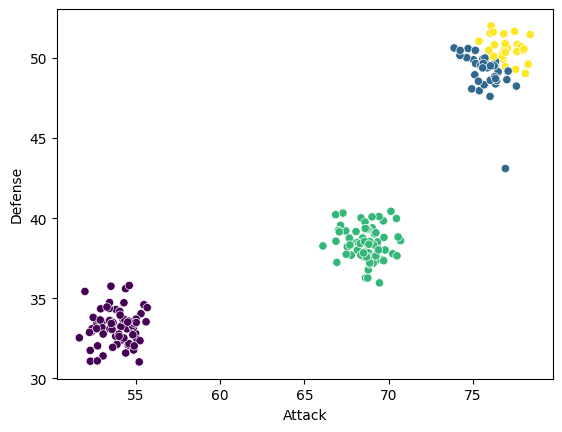

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

kmeans.fit(X)


predictions = kmeans.predict(X)
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

# Метод локтя, поиск инерции

c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

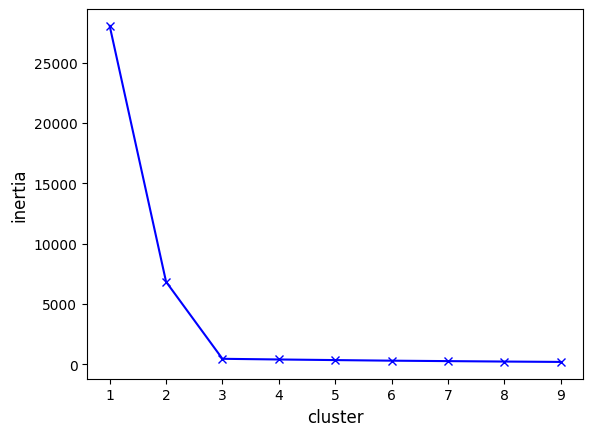

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means 
# и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia


inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) 
# и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

# Расчёт коэффициента силуэта

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

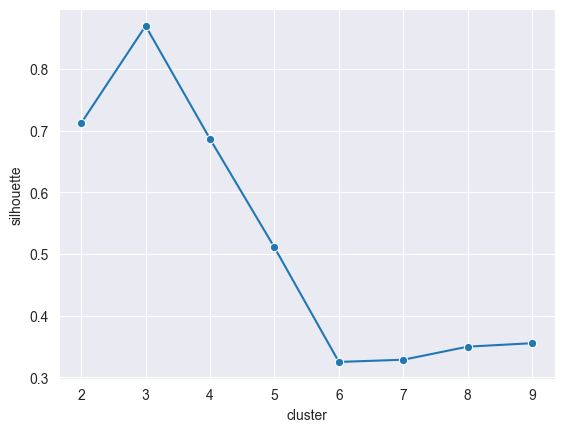

In [7]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, 
# к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

# Пример на данных

In [8]:
df_1 = pd.read_csv('values_from_the_instrument.zip')


Ищем инерцию через локоть

c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

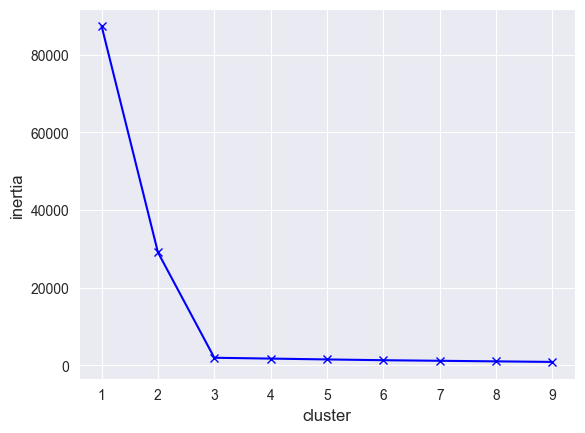

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means 
# и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia


inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) 
# и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, df_1))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Ищем коэффициент силуэта

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

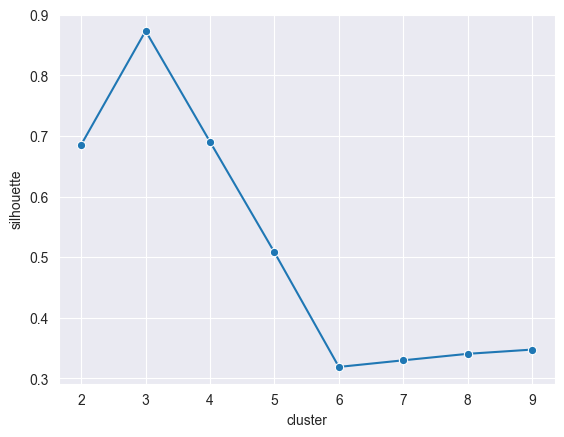

In [10]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, 
# к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df_1[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, df_1))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

<AxesSubplot: xlabel='x1', ylabel='x2'>

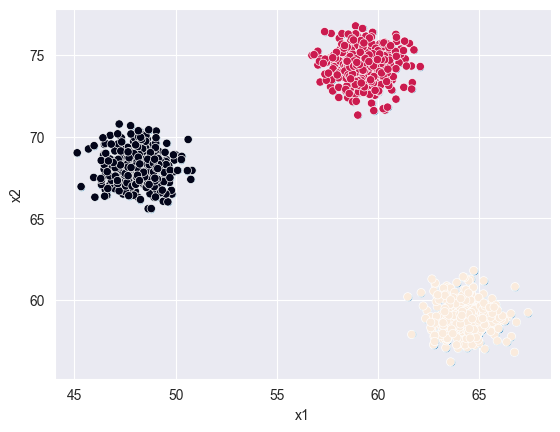

In [11]:
sns.scatterplot(x=df_1.x1, y=df_1.x2)

kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10, 
                random_state=42)

# запустим обучение модели
kmeans.fit(df_1)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(df_1)

# если мы хотим получить метки класса для тех же данных, 
# на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df_1['Clusters_k3'] = predictions

#визуализируем результаты. 
# Параметр c принимает вектор с номерами классов 
# для группировки объектов по цветам 
sns.scatterplot(x=df_1.x1, y=df_1.x2, c=predictions)

# Метрики

## ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)

In [12]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print()
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))
print()
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))
# labels_true — это реальные значения: 
# в кластере 0 — собаки, в кластере 1 — кошки. 
# В первый раз мы предсказали, что в кластере 0 находятся две собаки, 
# а в кластере 1 — две кошки. 
# Метрика однородности равна 1, так как внутри кластеров разные объекты 
# и наши ответы полностью совпали с labels_true.
# Во втором случае, казалось бы, будет неверно, 
# если в кластере 0 будут кошки, а в кластере 1 — собаки. 
# Но, судя по составу кластеров, кошки и собаки не перемешались, 
# поэтому однородность кластеров будет равна 1

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))




1.0

1.0

0.737175493807016
1.0
1.0


## ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)

In [13]:
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


## V-МЕРА (V-MEASURE)

In [14]:
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))


print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


## ИНДЕКС РЭНДА

In [15]:
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])


1.0

# Иерархическая кластеризация

## Агломерация 
n_clusters — количество кластеров; по умолчанию — 2.  
linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.

# EM-КЛАСТЕРИЗАЦИЮ
# GaussianMixture

array([1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2], dtype=int64)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

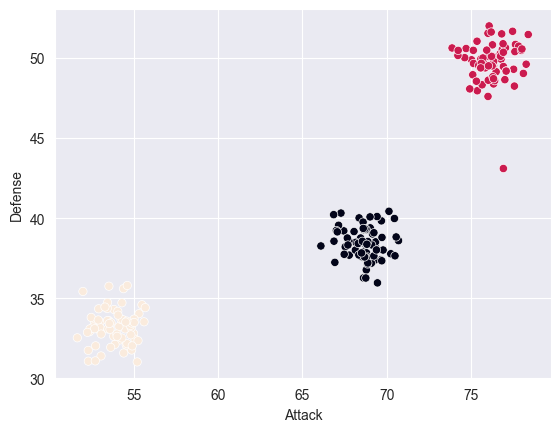

In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture

df = pd.read_csv('pokemon.zip')
X = df[['Attack', 'Defense']]

gm_clustering = GaussianMixture(n_components=3, # количество кластеров
                                random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)\

df['Clusters_GaussianMixture'] = gm_prediction
display(gm_prediction)
#визуализируем результаты. 
# Параметр c принимает вектор с номерами классов 
# для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

# Спектральная кластеризация

In [17]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

# DBSCAN Кластеризация на основе плотности

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

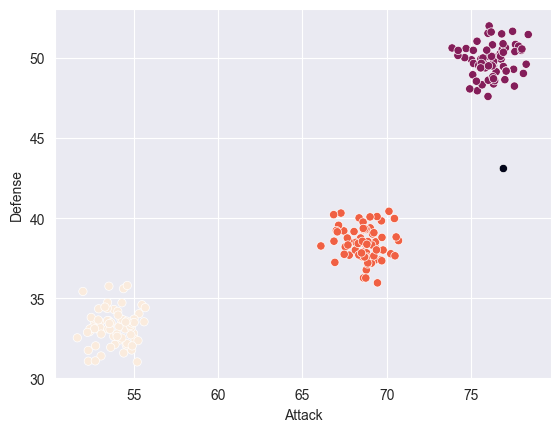

In [18]:
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, # eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
                    min_samples=3 # min_samples — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.
                    ).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

# УМЕНЬШЕНИЕ РАЗМЕРНОСТИ

### Метод главных компонент, или PCA (Principal Components Analysis)

In [20]:

from sklearn.decomposition import PCA
# создаём объект класса PCA
pca = PCA(n_components=2, #  количество компонентов для проведения трансформации
          random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)

# обучить модель и применить трансформацию уменьшения размерности
pca.fit_transform(X)

array([[-1.53791623e+01, -1.75785186e+00],
       [-2.98130699e-01,  1.70345815e+00],
       [-1.21550937e+01, -8.20419437e-02],
       [-1.54713149e+01, -1.55547869e+00],
       [-5.02838962e-01,  3.47247556e+00],
       [ 1.37978799e+01, -9.48484290e-01],
       [-1.38672909e+01, -1.90460153e+00],
       [ 1.56042734e+01, -2.04379217e+00],
       [ 1.23973059e+01, -3.03803696e+00],
       [ 1.35571148e+01, -4.19682231e-01],
       [-1.02492988e+01,  4.10148415e+00],
       [ 1.42731502e+01, -1.93227169e+00],
       [ 1.36209197e+01, -2.32057076e+00],
       [-1.47947825e+01, -3.60979573e+00],
       [-8.47057375e-01,  2.65027440e+00],
       [-1.50892757e+01, -1.41397822e+00],
       [ 1.44553459e+01, -5.71218663e-01],
       [-1.31112390e+00,  2.34495748e+00],
       [-3.18459401e+00,  2.83858850e+00],
       [ 1.21036156e+01, -1.58541953e+00],
       [-1.27073038e+01, -2.50795483e+00],
       [ 1.37002034e+01, -8.42461471e-02],
       [ 1.44492306e+01, -4.30914860e+00],
       [ 1.

MNIST — это данные, основанные на рукописном начертании цифр  
Для данного датасета обучим модель, которая по пикселям изображения предсказывает, что за цифра на нём изображена. Первой мы разработаем модель, которая будет учитывать все признаки, а затем уменьшим размерность данных с помощью PCA и ещё раз обучим модель. Далее мы сравним качество полученных моделей и время, которое было затрачено на обучение в каждом случае.

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")

# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [22]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    delta_time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return delta_time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 93.91315770149231, метрика модели 0.9262857142857143
Модель, построенная на всех исходных признаках. Время обучения 221.30568027496338, метрика модели 0.9187142857142857


### t-SNE (t-distributed Stochastic Neighbor Embedding)  
«стохастическое вложение соседей с t-распределением»
n_components — размерность нового пространства.  
perplexity — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.  
n_iter — количество итераций для оптимизации.  
random_state — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

In [24]:
from sklearn.manifold import TSNE

# создаём объект класса TSNE

tsne = TSNE(n_components=2, # n_components — размерность нового пространства
            perplexity=30, # описывает ожидаемую плотность вокруг точки от 5 до 50.
            n_iter=500, 
            random_state=42)
# обучаем модель на данных X и производим трансформацию
tsne.fit_transform(X)

KeyboardInterrupt: 

Уменьшим размерность с помощью PCA:

<AxesSubplot: xlabel='0', ylabel='1'>

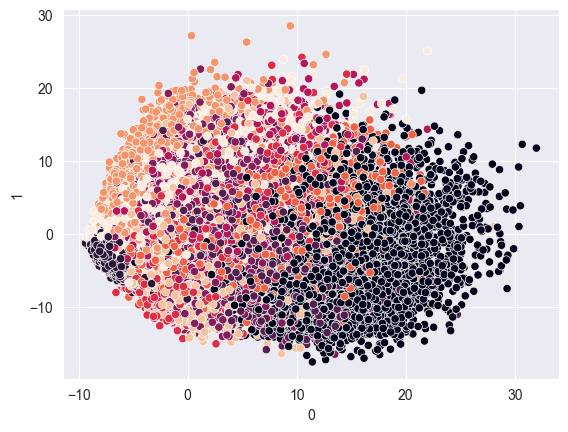

In [25]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)
# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

Уменьшим размерность с помощью t-SNE:

<AxesSubplot: xlabel='0', ylabel='1'>

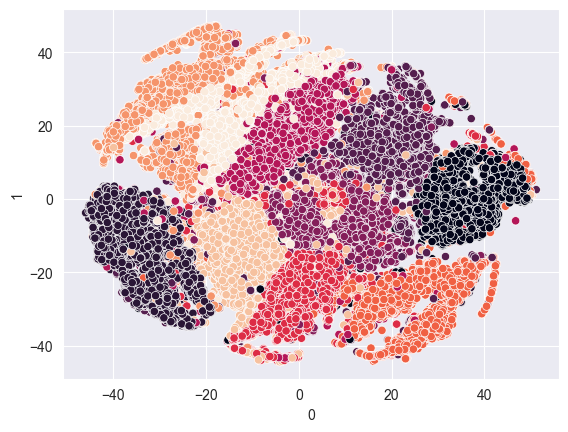

In [26]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# уменьшим размерность данных
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()# визуализируем
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])